<a href="https://colab.research.google.com/github/RodolphoSartori/IPCA-X-DESEMPREGO-v1/blob/main/Infla%C3%A7%C3%A3o_x_Desemprego.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [ ]:
import pandas as pd
import plotnine as p9
import statsmodels.formula.api as smf

#Coleta de Dados

In [ ]:
dados_brutos_ipca = pd.read_json("https://apisidra.ibge.gov.br/values/t/1737/n1/all/v/2265/p/all/d/v2265%202")
dados_brutos_ipca

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Variável (Código),Variável,Mês (Código),Mês
1,1,Brasil,,,...,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,197912,dezembro 1979
2,1,Brasil,,,...,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,198001,janeiro 1980
3,1,Brasil,,,...,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,198002,fevereiro 1980
4,1,Brasil,,,...,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,198003,março 1980
...,...,...,...,...,...,...,...,...,...,...,...
535,1,Brasil,2,%,4.23,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,202406,junho 2024
536,1,Brasil,2,%,4.50,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,202407,julho 2024
537,1,Brasil,2,%,4.24,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,202408,agosto 2024
538,1,Brasil,2,%,4.42,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,202409,setembro 2024


# Tratamento dos dados

In [ ]:
dados_tratados_ipca = (
    dados_brutos_ipca
    #Agora vou renomear o nome das colunas
    .rename(columns = {"V":"IPCA", "D3C" : "Data"})
    #Remover as linhas que não tinham valor. Elas estavam com ... e na coluna valor
    .query("IPCA not in ['Valor', '...']")
    #Criar função para ajustar para o modelo internacional
    .assign(
        Data = lambda x: pd.to_datetime(x.Data, format = "%Y%m"),
        IPCA = lambda x: x.IPCA.astype(float) #números devem estar no formato float
        )
    .filter(["Data", "IPCA"])
    .query("Data >=@pd.to_datetime ('2004-01-01')")
)

#Análise de Dados

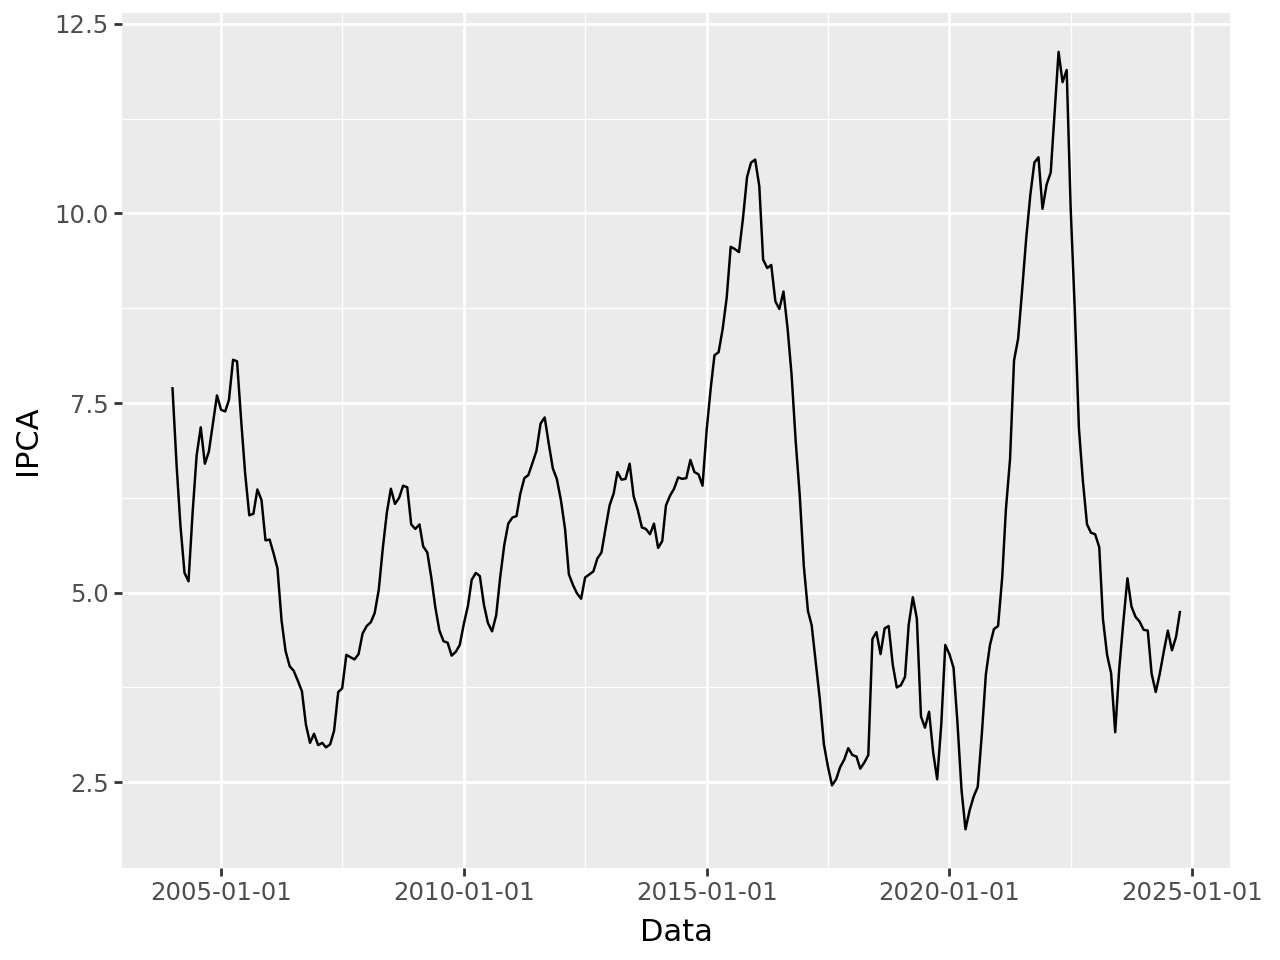

In [ ]:
# Como a Inflação se comportou no Brasil?
(
    p9.ggplot(dados_tratados_ipca) +
    p9.aes(x = "Data", y="IPCA") +
    p9.geom_line()
)

In [ ]:
# Qual o período com menores e maiores taxas de inflação? A função sort, ordena os valores do maior par ao menor
dados_tratados_ipca.sort_values("IPCA").set_index("Data")

,IPCA
Data,
2020-05-01,1.88
2020-06-01,2.13
2020-07-01,2.31
2020-04-01,2.40
2020-08-01,2.44
...,...
2021-11-01,10.74
2022-03-01,11.30
2022-05-01,11.73


In [ ]:
#Qual o valor médio da inflação e sua distribuição?
dados_tratados_ipca.describe()

,Data,IPCA
count,250,250.000000
mean,2014-05-17 03:38:52.800000,5.718680
min,2004-01-01 00:00:00,1.880000
25%,2009-03-08 18:00:00,4.230000
50%,2014-05-16 12:00:00,5.520000
75%,2019-07-24 06:00:00,6.627500
max,2024-10-01 00:00:00,12.130000
std,NaN,2.122769


/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 14'. Pick better value with 'binwidth'.


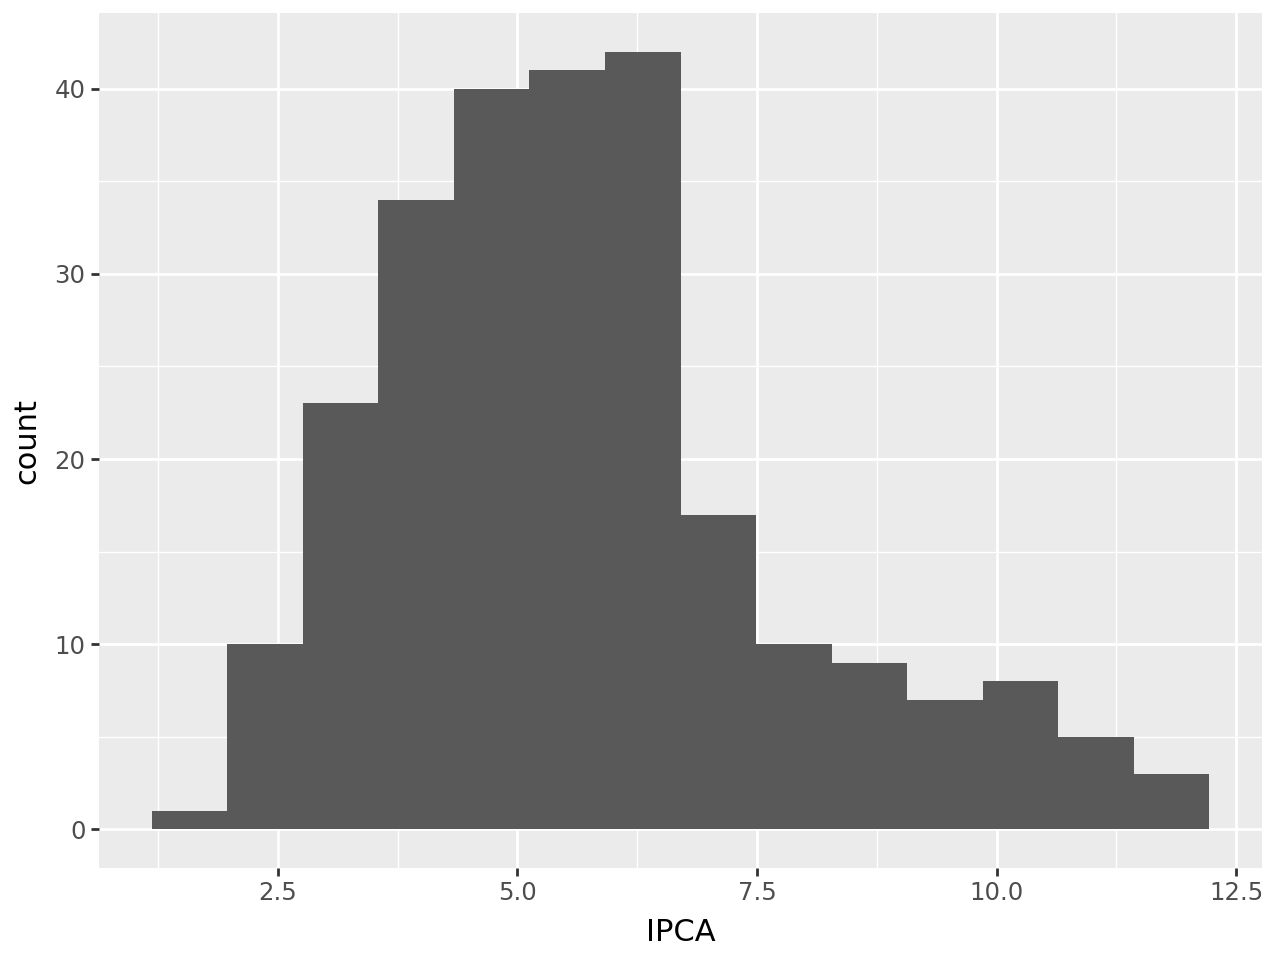

In [ ]:
p9.ggplot(dados_tratados_ipca) + p9.aes(x = "IPCA") + p9.geom_histogram()

In [ ]:
dados_brutos_desemprego = pd.read_json("https://apisidra.ibge.gov.br/values/t/6381/n1/all/v/4099/p/all/d/v4099%201")
dados_brutos_desemprego

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Variável (Código),Variável,Trimestre Móvel (Código),Trimestre Móvel
1,1,Brasil,2,%,8.0,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201203,jan-fev-mar 2012
2,1,Brasil,2,%,7.8,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201204,fev-mar-abr 2012
3,1,Brasil,2,%,7.7,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201205,mar-abr-mai 2012
4,1,Brasil,2,%,7.6,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201206,abr-mai-jun 2012
...,...,...,...,...,...,...,...,...,...,...,...
147,1,Brasil,2,%,7.1,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",202405,mar-abr-mai 2024
148,1,Brasil,2,%,6.9,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",202406,abr-mai-jun 2024
149,1,Brasil,2,%,6.8,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",202407,mai-jun-jul 2024
150,1,Brasil,2,%,6.6,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",202408,jun-jul-ago 2024


In [ ]:
dados_tratados_desemprego = (
    dados_brutos_desemprego
    #Agora vou renomear o nome das colunas
    .rename(columns = {"V":"Desemprego", "D3C" : "Data"})
    #Remover as linhas que não tinham valor. Elas estavam com ... e na coluna valor
    .query("Desemprego not in ['Valor', '...']")
    #Criar função para ajustar para o modelo internacional
    .assign(
        Data = lambda x: pd.to_datetime(x.Data, format = "%Y%m"),
        Desemprego = lambda x: x.Desemprego.astype(float) #números devem estar no formato float
        )
    .filter(["Data", "Desemprego"])
)

In [ ]:
#agora vamos juntas os dados na mesma tabela
dados_cruzados = (
    dados_tratados_ipca.set_index("Data").join(other =
                    dados_tratados_desemprego.set_index("Data"), how = "inner")
    .reset_index()
    )
dados_cruzados

,Data,IPCA,Desemprego
0,2012-03-01,5.24,8.0
1,2012-04-01,5.10,7.8
2,2012-05-01,4.99,7.7
3,2012-06-01,4.92,7.6
4,2012-07-01,5.20,7.5
...,...,...,...
146,2024-05-01,3.93,7.1
147,2024-06-01,4.23,6.9
148,2024-07-01,4.50,6.8
149,2024-08-01,4.24,6.6


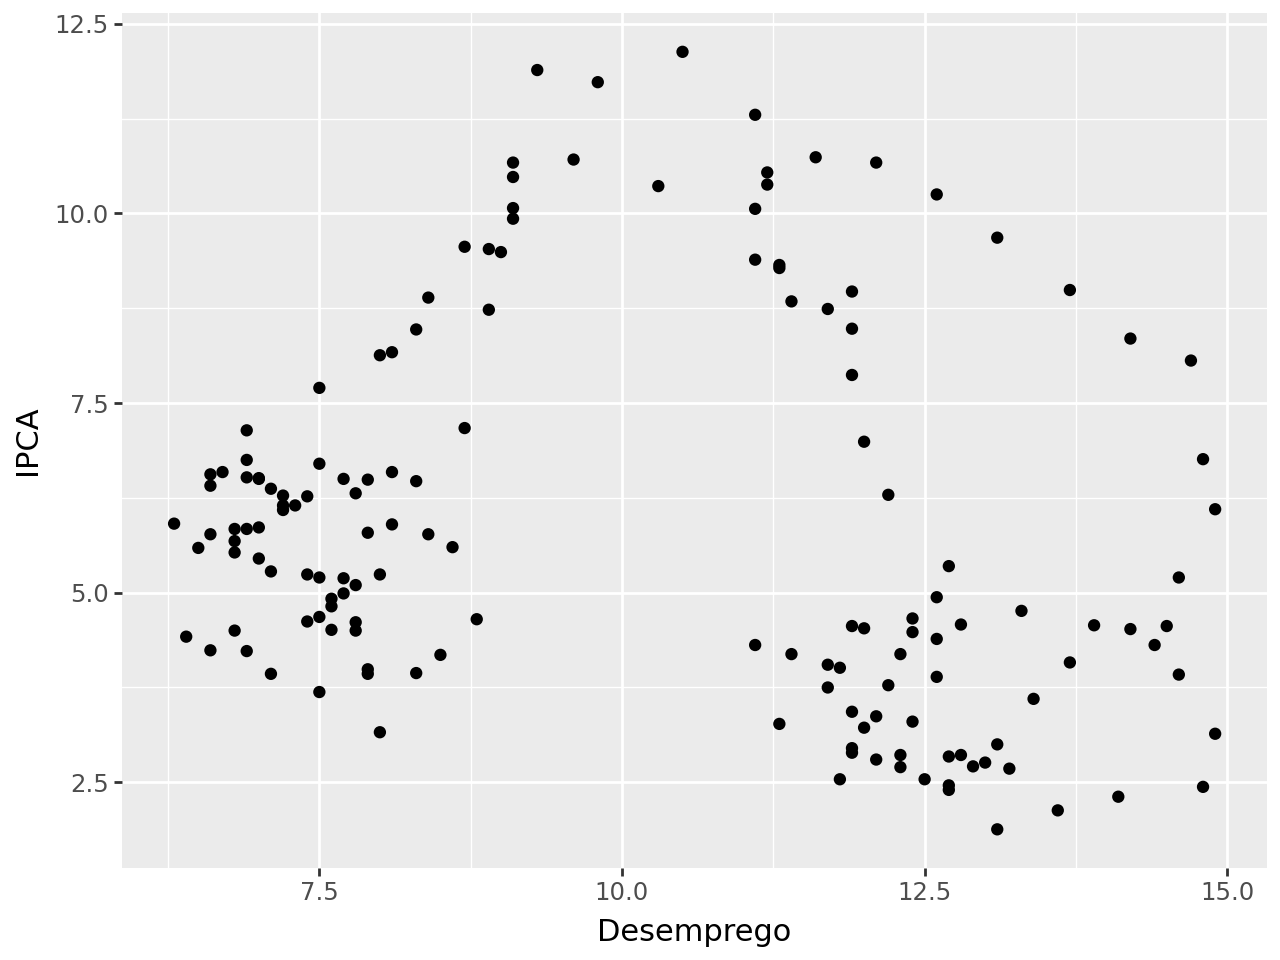

In [ ]:
(p9.ggplot(dados_cruzados) + p9.aes(x = "Desemprego", y = "IPCA") + p9.geom_point())

In [ ]:
modelo = (smf.ols("IPCA~Desemprego", data= dados_cruzados).fit())

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   IPCA   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     5.175
Date:                Fri, 22 Nov 2024   Prob (F-statistic):             0.0243
Time:                        01:44:50   Log-Likelihood:                -350.05
No. Observations:                 151   AIC:                             704.1
Df Residuals:                     149   BIC:                             710.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.6615      0.802      9.551      0.0

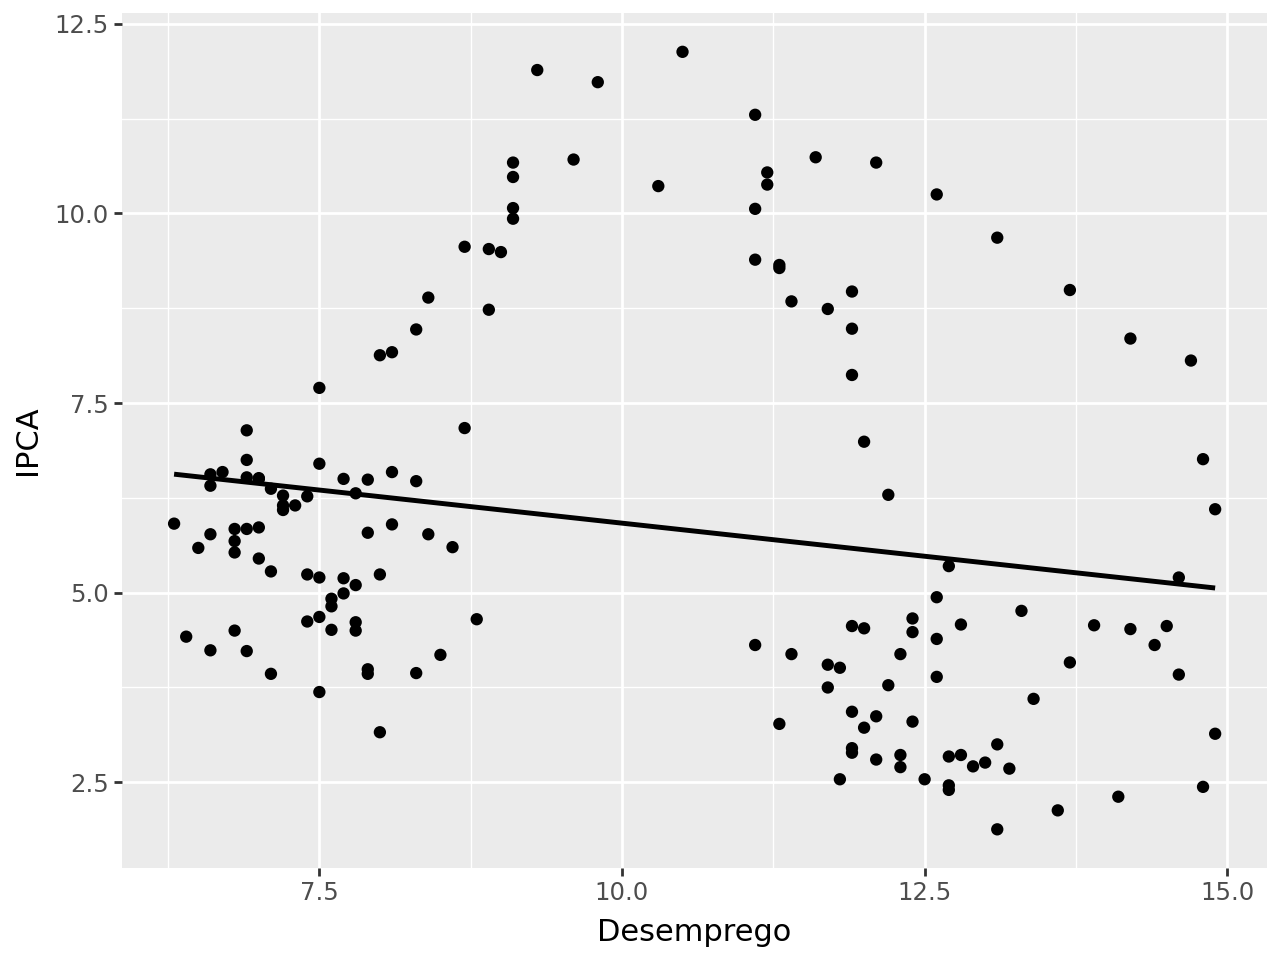

In [ ]:
(p9.ggplot(dados_cruzados) + p9.aes(x = "Desemprego", y = "IPCA") + p9.geom_point() +
 p9.geom_smooth(method = "lm", se = False))